In [1]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
import csv
import requests

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="162a38387688451f892841c7abd6e094" 
secret = "xx"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


import gmaps
# Google developer API key
from api import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
dataframe = pd.read_csv('SpotifyFeatures.csv')
dataframe.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
dataframe.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


Text(0.5, 1.0, 'Popularity Distribution')

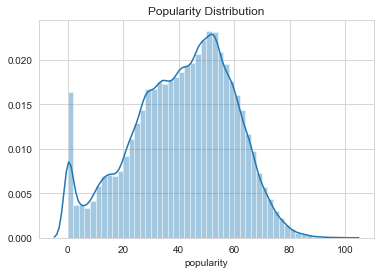

In [5]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [6]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
214526,Country,Alabama,Roll On (Eighteen Wheeler),31LOzuiEqzfMZ6f8nujDVd,50,0.115000,0.584,262627,0.456,0.000000,3,0.5560,-19.116,Major,0.0578,131.814,4/4,0.640
21107,Dance,Babyface,Never Keeping Secrets,7L06pF5o819jflseQ4Wde5,47,0.094900,0.693,293267,0.648,0.000000,11,0.1400,-6.411,Minor,0.0248,113.117,4/4,0.319
211127,World,Gateway Worship,The More I Seek You,5Bu9EOovWXioFMxkXBA2lc,35,0.953000,0.387,254200,0.227,0.000000,5,0.0912,-11.923,Major,0.0369,133.984,4/4,0.209
157146,Ska,Bad Brains,Attitude,24DaDLmSzMMmiQIwaU2BxA,44,0.000153,0.144,79853,0.889,0.000056,4,0.2350,-11.505,Major,0.0636,166.844,4/4,0.221
80475,Opera,Luciano Pavarotti,"Turandot, Act 3: ""Nessun dorma""",6O3srQUADwy0oIv0YjE5Cq,9,0.853000,0.203,223520,0.439,0.000923,8,0.8940,-12.625,Major,0.0596,85.421,3/4,0.145


In [7]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
69334,Hip-Hop,Rich Brian,Crisis (feat. 21 Savage),6GmjF0MtrK8UHQlIh6tzRt,60,0.06990,0.898,216190,0.671,0.000052,11,0.120,-5.942,0,0.2270,144.992,4/4,0.668
84116,R&B,Smino,Raw,11tjhGFhTOXajEmP6wH01w,44,0.44600,0.684,176628,0.580,0.000000,5,0.227,-7.845,0,0.4490,80.736,4/4,0.902
218941,World,Casting Crowns,No Not One - Live,7x6gcl5pAEDFfAeaVAXnjE,33,0.01410,0.550,262347,0.780,0.000006,4,0.976,-5.473,1,0.0368,115.992,4/4,0.376
2079,Country,Conway Twitty,Goodbye Time,1DnIEgriG76BdHs9iTCbKa,41,0.59000,0.507,207627,0.216,0.000026,8,0.110,-14.850,1,0.0291,147.111,4/4,0.279
224451,Rock,blink-182,Stay Together For The Kids,3YD9EehnGOf88rGSZFrnHg,64,0.00165,0.519,239333,0.780,0.000021,8,0.156,-4.939,1,0.0356,145.125,4/4,0.166


In [8]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
59763,R&B,Jorja Smith,Beautiful Little Fools,1NEg5LHpn3reJ79r6IY0M6,56,0.778000,0.525,216498,0.402,0.136000,3,0.3220,-10.570,0,0.0876,130.099,0,0.136
36690,Electronic,Ray Volpe,Mind Games,0JuRNiAaze3MnaxgaQt1IS,31,0.000043,0.629,278400,0.914,0.544000,0,0.1080,-2.577,1,0.0509,149.991,0,0.183
42096,Folk,José González,Crosses,0ByKWq0hsuYriK5avSMJ5r,53,0.905000,0.667,162920,0.372,0.024100,11,0.1020,-9.944,0,0.0296,134.607,0,0.317
131979,Reggae,Katchafire,Seriously,0LgfSXp1G6eq99WklFvb88,40,0.471000,0.795,201013,0.458,0.000000,10,0.3450,-7.122,1,0.0415,94.545,0,0.930
229673,Soul,Mura Masa,NOTHING ELSE! (feat. Jamie Lidell),5bewkBDtMY5rrXCYBFspfF,48,0.095500,0.799,206560,0.536,0.000002,8,0.0843,-7.313,1,0.2250,111.986,0,0.530


In [9]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.6890,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.6100,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.5200,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.3660,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.6210,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
140,R&B,ELHAE,Needs,7KdRu0h7PQ0Ecfa37rUBzW,1,0.66100,0.510,205640,0.3310,0.000000,11,0.1230,-13.073,0,0.0895,124.657,0,0.2250
141,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,1,0.66700,0.670,239147,0.6490,0.000130,2,0.1090,-7.426,0,0.0875,147.935,0,0.6180
142,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,1,0.97500,0.377,334570,0.2550,0.000208,5,0.1020,-11.165,0,0.0387,125.004,1,0.3700
143,R&B,Layton Greene,Roll In Peace,33YFwLJbAdgePluIuEVa9p,1,0.72000,0.523,170343,0.5070,0.000000,4,0.0774,-6.448,0,0.2250,140.368,0,0.7000
144,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,1,0.03590,0.761,219120,0.6390,0.000000,3,0.0945,-7.577,0,0.0539,164.088,0,0.9220


In [10]:
#DO NOT TOUCH THIS CODE

test=dataframe.loc[dataframe['popularity'] == 1]
test=test[['genre','popularity']]
test=test.groupby("genre").count()
test=test.reset_index(inplace=False)
test=test.sort_values('popularity',ascending=False)
test

,genre,popularity
15,Pop,9052
17,Rap,5915
20,Rock,5887
10,Hip-Hop,4891
7,Dance,4418
11,Indie,3538
3,Children’s Music,3405
16,R&B,2624
9,Folk,1884
0,Alternative,1748


In [11]:
#DO NOT TOUCH THIS CODE

list1=list(test['genre'])
list1

['Pop',
 'Rap',
 'Rock',
 'Hip-Hop',
 'Dance',
 'Indie',
 'Children’s Music',
 'R&B',
 'Folk',
 'Alternative',
 'Soul',
 'Country',
 'Reggaeton',
 'Jazz',
 'Electronic',
 'Reggae',
 'Blues',
 'World',
 'Ska',
 'Soundtrack',
 'Classical',
 'Movie',
 'Anime',
 'Opera',
 'Comedy']

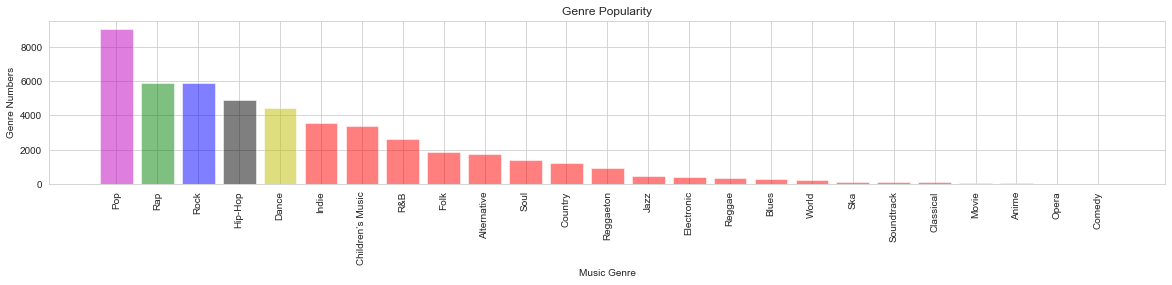

In [12]:
#DO NOT TOUCH THIS CODE

#graph the graph
x_axis = np.arange(len(test))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.title("Genre Popularity")
plt.xlabel("Music Genre")
plt.ylabel("Genre Numbers")

plt.bar(x_axis, test["popularity"], alpha=0.5, align="edge",color='mgbkyrrrrrrrrrrrrrrrrrrr')
plt.xticks(tick_locations, list1, rotation="vertical")
plt.show()

In [13]:
#DO NOT TOUCH THIS CODE

print("The most popular 5 most popular Genres of music right now are: Pop, Rap, Rock, Hip-Hop, and Dance!")


The most popular 5 most popular Genres of music right now are: Pop, Rap, Rock, Hip-Hop, and Dance!


In [14]:
#DO NOT TOUCH THIS CODE

#Female - Lizzo(95)     Male - Shawn Mendes (100)   Group - Y2K (96)
people = ["Lizzo", "Shawn Mendes", "Y2K"]
pop_num = [95, 100, 96]
colors = ["yellowgreen", "lightcoral", "lightskyblue"]
explode = (0, 0.09, 0)

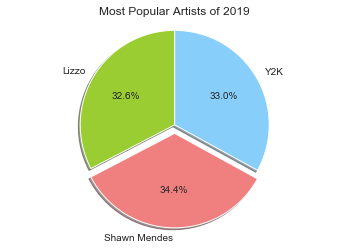

In [15]:
#DO NOT TOUCH THIS CODE

plt.title("Most Popular Artists of 2019")
plt.pie(pop_num, explode=explode, labels=people, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [16]:
#DO NOT TOUCH THIS CODE

#most listened to in country
country = ["Santiago, Chile", "Mexico City, Mexico", "Jakarta, Indonesia",
          "Chicago, IL", "Palo, Brazil"]
times_listened = [2200000, 1700000, 1107163, 1200000, 1036000]
colors = ["magenta", "green", "blue", "purple", "yellow"]
explode = (0.09, 0, 0, 0, 0)



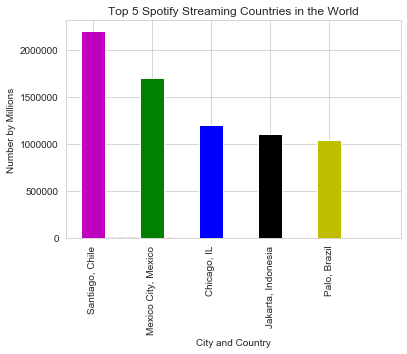

In [17]:
#DO NOT TOUCH THIS CODE

plt.bar(x_axis, test["popularity"], alpha=0.5, align="edge",color='mgbkyrrrrrrrrrrrrrrrrrrr')
plt.xticks(tick_locations, list1, rotation="vertical")

#################
times_listened = [2200000, 1700000, 1200000, 1107163, 1036000]
xstream_axis = [0,5,10,15,20]

plt.bar(xstream_axis, times_listened, color='mgbky', alpha=1, width=2)

tickstream_locations = [value for value in x_axis]
plt.xticks(xstream_axis, ["Santiago, Chile", "Mexico City, Mexico", "Chicago, IL",
                                  "Jakarta, Indonesia", "Palo, Brazil"], rotation ="vertical")
plt.title("Top 5 Spotify Streaming Countries in the World")
plt.xlabel("City and Country")
plt.ylabel("Number by Millions")
plt.show()

In [18]:
countries_df = pd.read_csv('countries_spotify.csv')
countries_df.head()

,sort,City,Country,Lat,Long
0,0,Santiago,Chile,-33.447487,-70.673676
1,1,Mexico City,Mexico,19.432608,-99.133209
2,2,Chicago,USA,41.881832,-87.623177
3,3,Jakarta,Indonesia,-6.200000,106.816666
4,4,Sao Paulo,Brazil,-23.533733,-46.625290


In [23]:
#heat map
locations = countries_df[["Lat", "Long"]]
rating = countries_df["sort"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=1,
                                 point_radius=1)

fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
#hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=1,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
# Plot as a Terrain map
fig = gmaps.figure(map_type="TERRAIN")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=1,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

Text(0.5, 1.0, 'Popularity Based on Key')

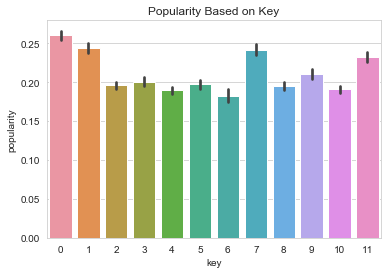

In [22]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')